In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
mid_deaths_df = df[(df["role"] == "MIDDLE") & (df["eventType"] == "Death")]
mid_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13684,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,3.865933,7971.0,8191.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13694,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,8.375033,6599.0,8253.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13701,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,11.170400,7711.0,7729.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13710,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,16.016617,13316.0,6439.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13717,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,18.623533,5654.0,13285.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279119,KR_6376021134,Red,anonymous 78,kr,Viktor,13.154817,8226.0,7527.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279134,KR_6376021134,Red,anonymous 78,kr,Viktor,19.758767,1570.0,9959.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279136,KR_6376021134,Red,anonymous 78,kr,Viktor,20.939400,5902.0,10592.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279140,KR_6376021134,Red,anonymous 78,kr,Viktor,22.824517,14116.0,10834.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE


Champions' winrates

In [4]:
profiling_df = mid_deaths_df[(mid_deaths_df["victory"] == True)].copy()

In [5]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [6]:
profiling_df = mid_deaths_df[(mid_deaths_df["victory"] == False)].copy()

In [7]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)

,win rate,matches
champion,,
AurelionSol,0.49,144.0
Tristana,0.51,93.0
Jayce,0.55,88.0
Sylas,0.43,76.0
Azir,0.49,75.0
Akali,0.49,69.0
Annie,0.59,64.0
Viktor,0.50,60.0
Syndra,0.52,54.0


In [8]:
print("This dataset contains {} matches in which the mid died at least once".format(len(np.unique(mid_deaths_df["gameId"]))))

This dataset contains 1081 matches in which the mid died at least once


In [9]:
print("{} players died a total of {} times".format(len(np.unique(mid_deaths_df["summoner"])), mid_deaths_df.shape[0]))

19 players died a total of 5777 times


In [10]:
print("This Dataset contains an average of {} deaths per game".format((mid_deaths_df.shape[0]/len(np.unique(mid_deaths_df["gameId"])))))

This Dataset contains an average of 5.344125809435708 deaths per game


In [11]:
blueSide_mid_deaths_df = mid_deaths_df[mid_deaths_df["team"] == "Blue"]
blueSide_mid_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13863,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,20.736583,13802.0,5393.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13880,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,29.345550,1845.0,3664.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13982,EUW1_6272124801,Blue,anonymous 52,euw1,Zoe,23.195683,8941.0,9426.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13985,EUW1_6272124801,Blue,anonymous 52,euw1,Zoe,25.897300,6304.0,2372.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13994,EUW1_6272124801,Blue,anonymous 52,euw1,Zoe,30.825383,2128.0,3365.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278920,KR_6375941718,Blue,anonymous 76,kr,Vex,17.688167,13024.0,2038.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
278926,KR_6375941718,Blue,anonymous 76,kr,Vex,20.901083,6474.0,6565.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
278932,KR_6375941718,Blue,anonymous 76,kr,Vex,22.819950,8598.0,7492.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
278935,KR_6375941718,Blue,anonymous 76,kr,Vex,24.660650,4355.0,5101.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [12]:
gamesBlueSide = len(np.unique(blueSide_mid_deaths_df["gameId"]))
gamesBlueSide

467

In [13]:
players_df = np.unique(blueSide_mid_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_mid_deaths_df[blueSide_mid_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 52 played 42 matches
anonymous 53 played 31 matches
anonymous 54 played 39 matches
anonymous 56 played 20 matches
anonymous 57 played 60 matches
anonymous 58 played 14 matches
anonymous 59 played 9 matches
anonymous 60 played 21 matches
anonymous 62 played 22 matches
anonymous 63 played 30 matches
anonymous 64 played 16 matches
anonymous 65 played 29 matches
anonymous 68 played 21 matches
anonymous 71 played 27 matches
anonymous 74 played 12 matches
anonymous 75 played 19 matches
anonymous 76 played 15 matches
anonymous 77 played 13 matches
anonymous 78 played 27 matches


In [14]:
print("Blue side contains {} matches in which the mid died at least once".format(len(np.unique(blueSide_mid_deaths_df["gameId"]))))

Blue side contains 467 matches in which the mid died at least once


In [15]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_mid_deaths_df["summoner"])), blueSide_mid_deaths_df.shape[0]))

19 players died a total of 2498 times on the blue side


In [16]:
redSide_mid_deaths_df = mid_deaths_df[mid_deaths_df["team"] == "Red"]
redSide_mid_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13684,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,3.865933,7971.0,8191.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13694,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,8.375033,6599.0,8253.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13701,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,11.170400,7711.0,7729.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13710,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,16.016617,13316.0,6439.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13717,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,18.623533,5654.0,13285.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279119,KR_6376021134,Red,anonymous 78,kr,Viktor,13.154817,8226.0,7527.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279134,KR_6376021134,Red,anonymous 78,kr,Viktor,19.758767,1570.0,9959.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279136,KR_6376021134,Red,anonymous 78,kr,Viktor,20.939400,5902.0,10592.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279140,KR_6376021134,Red,anonymous 78,kr,Viktor,22.824517,14116.0,10834.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [17]:
gamesRedSide = len(np.unique(redSide_mid_deaths_df["gameId"]))
gamesRedSide

653

In [18]:
players_df = np.unique(redSide_mid_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_mid_deaths_df[redSide_mid_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 52 played 59 matches
anonymous 53 played 39 matches
anonymous 54 played 51 matches
anonymous 56 played 30 matches
anonymous 57 played 85 matches
anonymous 58 played 22 matches
anonymous 59 played 22 matches
anonymous 60 played 38 matches
anonymous 62 played 22 matches
anonymous 63 played 65 matches
anonymous 64 played 21 matches
anonymous 65 played 23 matches
anonymous 68 played 17 matches
anonymous 71 played 34 matches
anonymous 74 played 10 matches
anonymous 75 played 40 matches
anonymous 76 played 11 matches
anonymous 77 played 23 matches
anonymous 78 played 41 matches


In [19]:
print("Red side contains {} matches in which the mid died at least once".format(len(np.unique(redSide_mid_deaths_df["gameId"]))))

Red side contains 653 matches in which the mid died at least once


In [20]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_mid_deaths_df["summoner"])), redSide_mid_deaths_df.shape[0]))

19 players died a total of 3279 times on the red side


function to visualize the results

In [21]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Mid Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Mid Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [22]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [23]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [24]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [25]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [26]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

---
### Clustering Red Team Victory

In [27]:
redSideVictory_df = mid_deaths_df[(mid_deaths_df["team"] == "Red") & (mid_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13776,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,3.196450,5099.0,7769.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13782,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,5.775950,9402.0,9048.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13787,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,8.088700,8460.0,8350.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13791,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,9.290750,8613.0,6560.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13795,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,10.680233,6225.0,8479.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279048,KR_6376044922,Red,anonymous 78,kr,Azir,16.614967,14023.0,6113.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279054,KR_6376044922,Red,anonymous 78,kr,Azir,18.805617,4049.0,9916.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279063,KR_6376044922,Red,anonymous 78,kr,Azir,23.469233,4857.0,8954.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279069,KR_6376044922,Red,anonymous 78,kr,Azir,26.676517,12776.0,5216.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [28]:
profiling_df = mid_deaths_df[(mid_deaths_df["team"] == "Red") & (mid_deaths_df["victory"] == True)].copy()

In [29]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [30]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

53.13935681470138

In [31]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_mid_deaths_df.shape[0]) * 100
winRateRedSide

41.20158584934431

In [32]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 52 won 33 matches on the red side
anonymous 52 has an average of 3.1515151515151514 deaths per game when winning on the red side

anonymous 53 won 17 matches on the red side
anonymous 53 has an average of 5.588235294117647 deaths per game when winning on the red side

anonymous 54 won 29 matches on the red side
anonymous 54 has an average of 3.689655172413793 deaths per game when winning on the red side

anonymous 56 won 15 matches on the red side
anonymous 56 has an average of 4.133333333333334 deaths per game when winning on the red side

anonymous 57 won 50 matches on the red side
anonymous 57 has an average of 4.42 deaths per game when winning on the red side

anonymous 58 won 12 matches on the red side
anonymous 58 has an average of 5.0 deaths per game when winning on the red side

anonymous 59 won 9 matches on the red side
anonymous 59 has an average of 2.4444444444444446 deaths per game when winning on the red side

anonymous 60 won 23 matches on the red side
anonymous

In [33]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 347 matches in which the jungler died at least once
19 players died a total of 1351 times on the red side
Victory games on red side contains an average of 3.893371757925072 deaths per game


In [34]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
13776,5099.0,7769.0,3.196450
13782,9402.0,9048.0,5.775950
13787,8460.0,8350.0,8.088700
13791,8613.0,6560.0,9.290750
13795,6225.0,8479.0,10.680233
...,...,...,...
279048,14023.0,6113.0,16.614967
279054,4049.0,9916.0,18.805617
279063,4857.0,8954.0,23.469233
279069,12776.0,5216.0,26.676517


Time discretization

In [35]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [36]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [37]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [38]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [39]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
13776,-0.599158,0.279138,-1
13782,0.804859,0.700613,-1
13787,0.497496,0.470598,-1
13791,0.547418,-0.119270,-1
13795,-0.231758,0.513108,-1
...,...,...,...
279048,2.312635,-0.266572,0
279054,-0.941760,0.986649,0
279063,-0.678120,0.669637,0
279069,1.905754,-0.562164,1


[2 3 4 5 6 7 8 9]


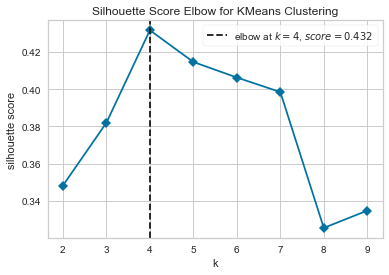

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [40]:
ks = np.arange(2,10, 1)
print(ks)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric= "silhouette")

visualizer.fit(redSideVictoryDiscretized_df.to_numpy())        # Fit the data to the visualizer
visualizer.show()   

In [40]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3482652401839357
Silhouette score for k=3: 0.38127452929608857
Silhouette score for k=4: 0.43173012118401033
Silhouette score for k=5: 0.41467927107432073
Silhouette score for k=6: 0.40619891165260535
Silhouette score for k=7: 0.39972898640545096
Silhouette score for k=8: 0.3255729500655686
Silhouette score for k=9: 0.3241191434503965
Silhouette score for k=10: 0.3469149378651661
Silhouette score for k=11: 0.3501851398372728
Silhouette score for k=12: 0.36267320827718524
Silhouette score for k=13: 0.35313468256136266
Silhouette score for k=14: 0.3634758686170282
Silhouette score for k=15: 0.3596331778362418
Silhouette score for k=16: 0.37209624178487977
Silhouette score for k=17: 0.3596173154825468
Silhouette score for k=18: 0.36331277584465865
Silhouette score for k=19: 0.3800843649392054
Silhouette score for k=20: 0.38670317743983657
Silhouette score for k=25: 0.36706328878580075


K-Means with k = 4

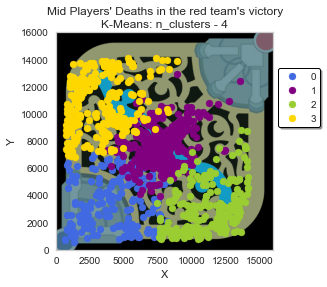

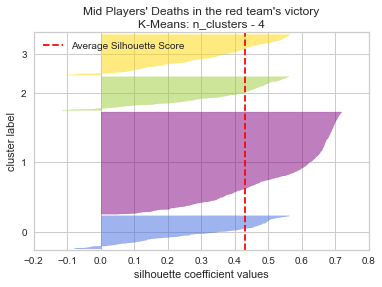

Silhouette score: 0.43173012118401033
1    659
3    262
2    217
0    213
Name: cluster, dtype: int64

Inertia: 1129.843889629857

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4379.765258,3898.380282,0.380282
1,1,7798.572079,7666.426404,-0.810319
2,2,11129.470046,3180.824885,-0.304147
3,3,3367.664122,10605.965649,-0.080153


In [41]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "purple", "yellowgreen", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [42]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2040.970215,1979.831555,0.557481
1,1,1293.002033,1214.718028,0.432535
2,2,1836.057623,1790.702969,0.621898
3,3,1889.144993,1984.991817,0.563918


In [43]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,8314.0,650.0,7687.0,556.0,1,-1
1,1,13531.0,3572.0,12966.0,3938.0,1,-1
2,2,14123.0,7399.0,8811.0,812.0,1,-1
3,3,8889.0,739.0,14124.0,6816.0,1,-1


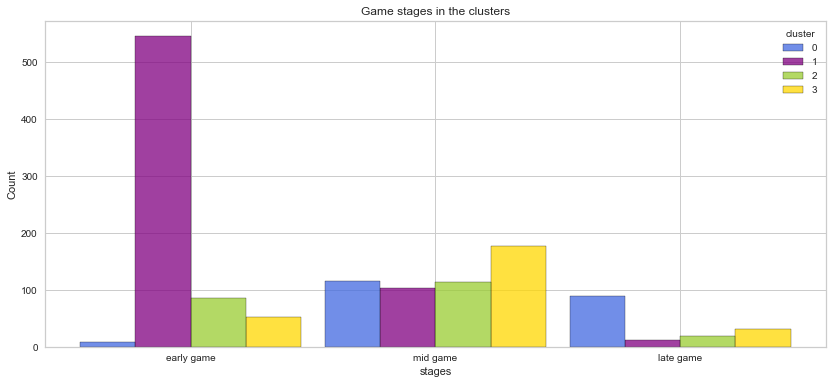

In [44]:
stagesPerClusterV2(redSideVictory_df, colors)

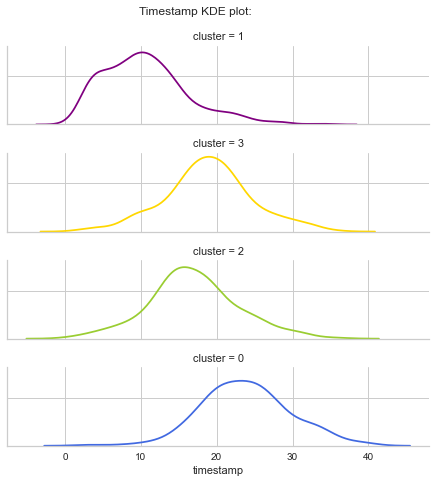

In [45]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [46]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
AurelionSol,46
Jayce,28
Azir,26
Tristana,25
Annie,22
Zoe,22
Sylas,19
Cassiopeia,18
Akali,17
Syndra,16


Deaths with each champion:

In [47]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



AurelionSol    165
Jayce          146
Tristana       107
Azir           102
Cassiopeia      86
Zoe             84
Annie           77
Syndra          74
Akali           61
Sylas           58
Viktor          47
Taliyah         42
Orianna         40
Yone            36
Irelia          34
Leblanc         32
Kassadin        27
LeeSin          14
Galio           12
Poppy           11
Gragas          10
Ahri             9
Lucian           8
TwistedFate      7
Sion             7
Corki            6
Lissandra        6
Ryze             5
Yasuo            5
Velkoz           4
Renekton         4
KSante           4
Swain            4
Vladimir         4
Rumble           3
Xerath           3
Tryndamere       3
Sett             2
Katarina         2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [48]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 39 champions when they won on the red side

Cluster 0 - died with 32 champions:
 ['Ahri' 'Akali' 'Annie' 'AurelionSol' 'Azir' 'Cassiopeia' 'Corki' 'Galio'
 'Gragas' 'Irelia' 'Jayce' 'KSante' 'Kassadin' 'Leblanc' 'LeeSin' 'Lucian'
 'Orianna' 'Poppy' 'Renekton' 'Rumble' 'Ryze' 'Sion' 'Sylas' 'Syndra'
 'Taliyah' 'Tristana' 'TwistedFate' 'Velkoz' 'Viktor' 'Vladimir' 'Yone'
 'Zoe']
Tristana       25
AurelionSol    24
Jayce          22
Zoe            15
Akali          14
Azir           13
Sylas          12
Syndra         10
Cassiopeia      8
Annie           7
Yone            6
Orianna         5
Viktor          5
Poppy           5
Sion            4
Lucian          4
Leblanc         4
Irelia          4
LeeSin          4
Kassadin        3
Galio           3
Taliyah         3
Corki           2
Ahri            2
Velkoz          2
KSante          1
Ryze            1
TwistedFate     1
Rumble          1
Vladimir        1
Renekton        1
Gragas          1
Name: champion, 

---
### Clustering Red Team Defeat

In [49]:
redSideDefeat_df = mid_deaths_df[(mid_deaths_df["team"] == "Red") & (mid_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13684,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,3.865933,7971.0,8191.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13694,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,8.375033,6599.0,8253.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13701,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,11.170400,7711.0,7729.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13710,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,16.016617,13316.0,6439.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13717,EUW1_6273554065,Red,anonymous 52,euw1,Syndra,18.623533,5654.0,13285.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279119,KR_6376021134,Red,anonymous 78,kr,Viktor,13.154817,8226.0,7527.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279134,KR_6376021134,Red,anonymous 78,kr,Viktor,19.758767,1570.0,9959.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279136,KR_6376021134,Red,anonymous 78,kr,Viktor,20.939400,5902.0,10592.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279140,KR_6376021134,Red,anonymous 78,kr,Viktor,22.824517,14116.0,10834.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [50]:
profiling_df = mid_deaths_df[(mid_deaths_df["team"] == "Red") & (mid_deaths_df["victory"] == False)].copy()

In [51]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_mid_deaths_df.shape[0]) * 100
winRateRedSide

58.79841415065569

In [52]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 52 lost 26 matches on the red side
anonymous 52 has an average of 5.6923076923076925 deaths per game when losing on the red side

anonymous 53 lost 22 matches on the red side
anonymous 53 has an average of 8.136363636363637 deaths per game when losing on the red side

anonymous 54 lost 22 matches on the red side
anonymous 54 has an average of 6.045454545454546 deaths per game when losing on the red side

anonymous 56 lost 15 matches on the red side
anonymous 56 has an average of 6.933333333333334 deaths per game when losing on the red side

anonymous 57 lost 35 matches on the red side
anonymous 57 has an average of 5.542857142857143 deaths per game when losing on the red side

anonymous 58 lost 10 matches on the red side
anonymous 58 has an average of 5.9 deaths per game when losing on the red side

anonymous 59 lost 13 matches on the red side
anonymous 59 has an average of 5.846153846153846 deaths per game when losing on the red side

anonymous 60 lost 15 matches on the red 

In [53]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 306 matches in which the jungler died at least once
19 players died a total of 1928 times on the red side
Defeat games on red side contains an average of 6.300653594771242 deaths per game


In [54]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
13684,7971.0,8191.0,3.865933
13694,6599.0,8253.0,8.375033
13701,7711.0,7729.0,11.170400
13710,13316.0,6439.0,16.016617
13717,5654.0,13285.0,18.623533
...,...,...,...
279119,8226.0,7527.0,13.154817
279134,1570.0,9959.0,19.758767
279136,5902.0,10592.0,20.939400
279140,14116.0,10834.0,22.824517


Time discretization

In [55]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [56]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [57]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [58]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [59]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
13684,-0.147369,0.010161,-1
13694,-0.599016,0.030408,-1
13701,-0.232958,-0.140715,-1
13710,1.612143,-0.561992,0
13717,-0.910099,1.673717,0
...,...,...,...
279119,-0.063426,-0.206683,-1
279134,-2.254504,0.587540,0
279136,-0.828460,0.794259,0
279140,1.875494,0.873290,0


In [60]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3128941038705325
Silhouette score for k=3: 0.3375243967771132
Silhouette score for k=4: 0.3911403627084674
Silhouette score for k=5: 0.3976110240032282
Silhouette score for k=6: 0.3874942819293722
Silhouette score for k=7: 0.3877896425886877
Silhouette score for k=8: 0.3848127026660181
Silhouette score for k=9: 0.32498638437711774
Silhouette score for k=10: 0.32556740425290603
Silhouette score for k=11: 0.32015108132291026
Silhouette score for k=12: 0.3375139302701393
Silhouette score for k=13: 0.33530998367163983
Silhouette score for k=14: 0.35022404449291766
Silhouette score for k=15: 0.3517366673874883
Silhouette score for k=16: 0.3456685728996743
Silhouette score for k=17: 0.3567786078800982
Silhouette score for k=18: 0.36008380824307246
Silhouette score for k=19: 0.3558728169231961
Silhouette score for k=20: 0.36891579257370016
Silhouette score for k=25: 0.3742351053845399


K-Means with k = 4

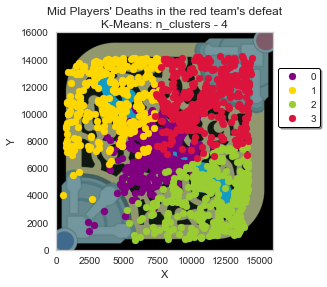

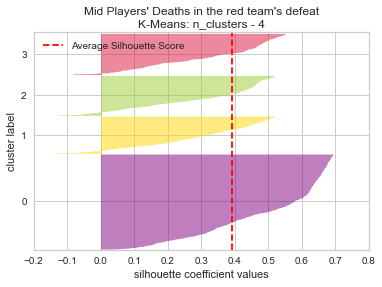

Silhouette score: 0.3911403627084674
0    860
3    372
2    361
1    335
Name: cluster, dtype: int64

Inertia: 1760.2283636819598

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7729.802326,7624.156977,-0.750000
1,1,4156.408955,10926.779104,0.047761
2,2,11432.409972,3875.274238,-0.324100
3,3,10924.935484,11064.623656,0.365591


In [61]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "gold", "yellowgreen", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [62]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1269.636698,1313.271284,0.476482
1,1,1909.601727,2150.509934,0.591572
2,2,2071.043652,1766.930189,0.655428
3,3,2025.312054,1898.643846,0.492633


In [63]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,11524.0,2355.0,11954.0,1406.0,1,-1
1,1,7570.0,524.0,14124.0,3756.0,1,-1
2,2,14129.0,5250.0,7960.0,734.0,1,-1
3,3,14420.0,7274.0,14258.0,6735.0,1,-1


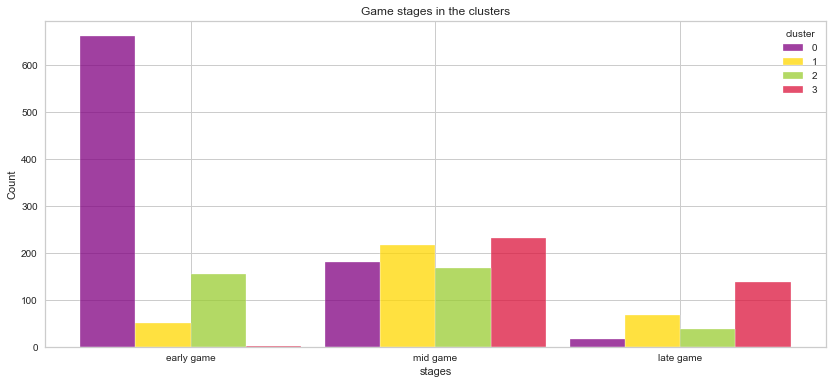

In [64]:
stagesPerClusterV2(redSideDefeat_df, colors)

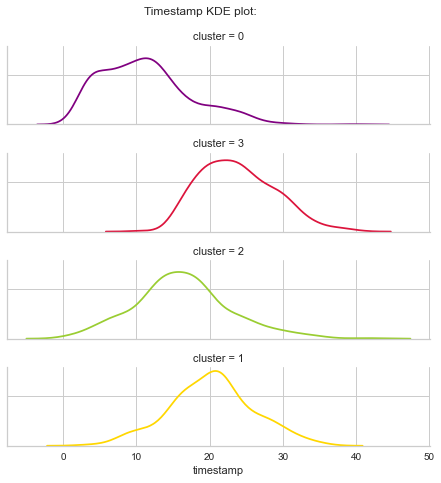

In [65]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [66]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
AurelionSol,34
Tristana,29
Azir,24
Sylas,23
Syndra,18
Akali,18
Jayce,18
Viktor,14
Annie,13
Taliyah,12


Deaths with each champion:

In [67]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



AurelionSol    214
Tristana       196
Azir           141
Jayce          120
Sylas          114
Taliyah        109
Akali          107
Syndra         107
Viktor          87
Cassiopeia      85
Annie           85
Irelia          71
Leblanc         66
Yone            58
Orianna         54
Ryze            46
Zoe             43
Kassadin        26
Gragas          26
Ezreal          25
Renekton        24
LeeSin          22
Rumble          15
Corki           10
Swain           10
Xerath           9
Yasuo            9
Karma            9
Vi               8
Varus            7
Lissandra        6
KogMaw           5
Ahri             5
Rakan            5
Zeri             4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [68]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 35 champions when they won on the red side

Cluster 0 - died with 35 champions:
 ['Ahri' 'Akali' 'Annie' 'AurelionSol' 'Azir' 'Cassiopeia' 'Corki' 'Ezreal'
 'Gragas' 'Irelia' 'Jayce' 'Karma' 'Kassadin' 'KogMaw' 'Leblanc' 'LeeSin'
 'Lissandra' 'Orianna' 'Rakan' 'Renekton' 'Rumble' 'Ryze' 'Swain' 'Sylas'
 'Syndra' 'Taliyah' 'Tristana' 'Varus' 'Vi' 'Viktor' 'Xerath' 'Yasuo'
 'Yone' 'Zeri' 'Zoe']
Tristana       91
AurelionSol    75
Azir           64
Syndra         55
Sylas          53
Taliyah        51
Jayce          51
Annie          44
Akali          38
Irelia         38
Cassiopeia     36
Viktor         35
Yone           32
Leblanc        29
Ryze           26
Orianna        24
Zoe            21
Kassadin       13
LeeSin         13
Ezreal         11
Renekton       11
Gragas          7
Yasuo           6
Swain           5
Vi              4
Varus           4
Rakan           3
Corki           3
KogMaw          3
Rumble          3
Ahri            3
Karma           3


---
### Clustering Blue Team Victory

In [11]:
blueSideVictory_df = mid_deaths_df[(mid_deaths_df["team"] == "Blue") & (mid_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
14009,EUW1_6272070095,Blue,anonymous 52,euw1,Sylas,4.944367,10203.0,7861.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
14032,EUW1_6272070095,Blue,anonymous 52,euw1,Sylas,15.841517,2446.0,11694.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
14049,EUW1_6272070095,Blue,anonymous 52,euw1,Sylas,20.432733,10422.0,6758.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
15272,EUW1_6272038938,Blue,anonymous 57,euw1,Syndra,6.734383,7075.0,7575.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
15288,EUW1_6272038938,Blue,anonymous 57,euw1,Syndra,15.627783,7010.0,6232.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278798,KR_6375935085,Blue,anonymous 75,kr,Viktor,20.639767,6638.0,10120.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
278802,KR_6375935085,Blue,anonymous 75,kr,Viktor,22.042383,9004.0,2566.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
278806,KR_6375935085,Blue,anonymous 75,kr,Viktor,23.729850,11041.0,1844.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
278809,KR_6375935085,Blue,anonymous 75,kr,Viktor,25.084217,6120.0,4402.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [12]:
profiling_df = mid_deaths_df[(mid_deaths_df["team"] == "Blue") & (mid_deaths_df["victory"] == True)].copy()

In [13]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [72]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

47.32334047109208

In [73]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_mid_deaths_df.shape[0]) * 100
winRateBlueSide

37.10968775020016

In [74]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 52 won 21 matches on the blue side
anonymous 52 has an average of 3.4761904761904763 deaths per game when winning on the blue side

anonymous 53 won 15 matches on the blue side
anonymous 53 has an average of 6.0 deaths per game when winning on the blue side

anonymous 54 won 16 matches on the blue side
anonymous 54 has an average of 4.8125 deaths per game when winning on the blue side

anonymous 56 won 8 matches on the blue side
anonymous 56 has an average of 4.0 deaths per game when winning on the blue side

anonymous 57 won 30 matches on the blue side
anonymous 57 has an average of 4.0 deaths per game when winning on the blue side

anonymous 58 won 5 matches on the blue side
anonymous 58 has an average of 5.6 deaths per game when winning on the blue side

anonymous 59 won 7 matches on the blue side
anonymous 59 has an average of 2.5714285714285716 deaths per game when winning on the blue side

anonymous 60 won 12 matches on the blue side
anonymous 60 has an average of 5.083

In [75]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 221 matches in which the jungler died at least once
19 players died a total of 927 times on the blue side
Victory games on blue side contains an average of 4.1945701357466065 deaths per game


In [76]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
14009,10203.0,7861.0,4.944367
14032,2446.0,11694.0,15.841517
14049,10422.0,6758.0,20.432733
15272,7075.0,7575.0,6.734383
15288,7010.0,6232.0,15.627783
...,...,...,...
278798,6638.0,10120.0,20.639767
278802,9004.0,2566.0,22.042383
278806,11041.0,1844.0,23.729850
278809,6120.0,4402.0,25.084217


Time discretization

In [77]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [78]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [79]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [80]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [81]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
14009,0.738829,0.067887,-1
14032,-1.763044,1.293762,0
14049,0.809463,-0.284875,0
15272,-0.270048,-0.023582,-1
15288,-0.291013,-0.453101,0
...,...,...,...
278798,-0.410994,0.790363,0
278802,0.352114,-1.625566,0
278806,1.009110,-1.856476,0
278809,-0.578065,-1.038374,1


In [82]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.32728185235848256
Silhouette score for k=3: 0.3602236864243008
Silhouette score for k=4: 0.40934631823913414
Silhouette score for k=5: 0.41420860383054836
Silhouette score for k=6: 0.40010751505986003
Silhouette score for k=7: 0.39402026956691216
Silhouette score for k=8: 0.38002003137254
Silhouette score for k=9: 0.3316247208995506
Silhouette score for k=10: 0.3366413265858823
Silhouette score for k=11: 0.3477985378523941
Silhouette score for k=12: 0.33858111094120186
Silhouette score for k=13: 0.35152185949713677
Silhouette score for k=14: 0.3471524055645293
Silhouette score for k=15: 0.35326094540826547
Silhouette score for k=16: 0.3561677126651055
Silhouette score for k=17: 0.36517308161806933
Silhouette score for k=18: 0.36309401065597763
Silhouette score for k=19: 0.36048259577109326
Silhouette score for k=20: 0.37594478304168905
Silhouette score for k=25: 0.3857414585152221


K-Means with k = 4

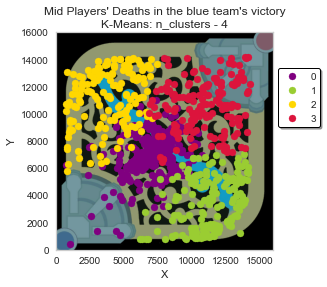

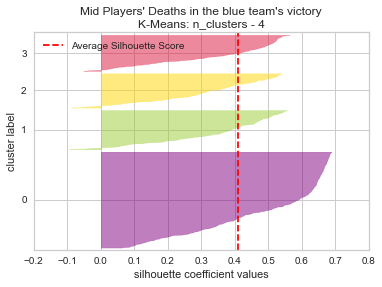

Silhouette score: 0.40934631823913414
0    432
1    177
3    163
2    155
Name: cluster, dtype: int64

Inertia: 818.8342914822922

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,6890.550926,6983.340278,-0.750000
1,1,11258.474576,3560.819209,-0.282486
2,2,3880.961290,11140.374194,-0.051613
3,3,10820.030675,10530.981595,0.343558


In [83]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "yellowgreen", "gold", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [84]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1396.483390,1357.315139,0.502309
1,1,1807.828123,1865.033109,0.610065
2,2,1846.698466,2081.563318,0.587982
3,3,1968.556447,1897.379855,0.546942


In [85]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,10761.0,734.0,11295.0,432.0,1,-1
1,1,14126.0,6215.0,7460.0,778.0,1,-1
2,2,7456.0,775.0,14110.0,5801.0,1,-1
3,3,14268.0,6865.0,14203.0,6451.0,1,-1


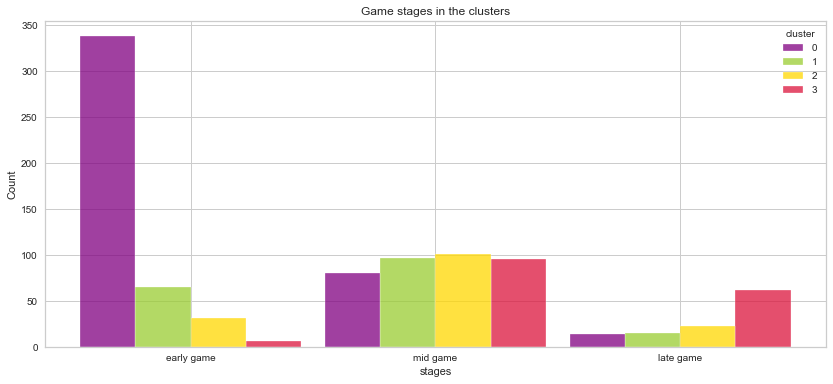

In [86]:
stagesPerClusterV2(blueSideVictory_df, colors)

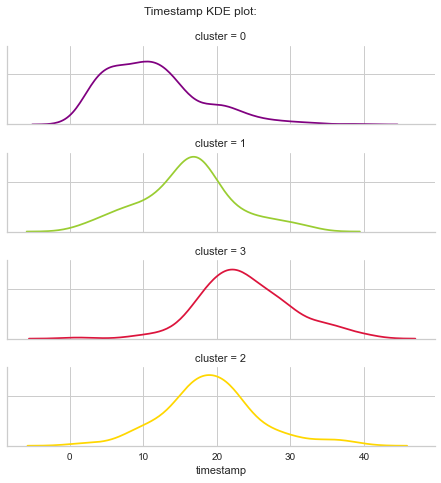

In [87]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [88]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
AurelionSol,24
Tristana,22
Jayce,20
Akali,17
Annie,16
Viktor,15
Sylas,14
Syndra,12
Azir,11
Cassiopeia,9


Deaths with each champion:

In [89]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Jayce          112
Tristana       108
AurelionSol     91
Akali           71
Annie           69
Viktor          62
Sylas           57
Syndra          45
Azir            42
Cassiopeia      37
Zoe             30
Orianna         24
Yone            20
Yasuo           18
Taliyah         17
Leblanc         16
Aatrox          15
Irelia          14
Vex             12
Ezreal           8
Varus            7
Renekton         7
Lissandra        7
Rumble           7
Ahri             7
LeeSin           6
Sejuani          6
Gragas           4
KogMaw           2
Swain            2
Kassadin         1
Galio            1
Zed              1
Seraphine        1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [90]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 34 champions when they won on the red side

Cluster 0 - died with 31 champions:
 ['Aatrox' 'Ahri' 'Akali' 'Annie' 'AurelionSol' 'Azir' 'Cassiopeia'
 'Ezreal' 'Galio' 'Irelia' 'Jayce' 'Kassadin' 'KogMaw' 'Leblanc' 'LeeSin'
 'Lissandra' 'Orianna' 'Renekton' 'Rumble' 'Sejuani' 'Swain' 'Sylas'
 'Syndra' 'Taliyah' 'Tristana' 'Varus' 'Vex' 'Viktor' 'Yasuo' 'Yone' 'Zoe']
Jayce          56
Tristana       45
AurelionSol    43
Annie          31
Akali          29
Sylas          25
Viktor         25
Syndra         23
Zoe            20
Azir           19
Cassiopeia     19
Orianna        13
Yone           12
Aatrox          9
Yasuo           9
Taliyah         8
Irelia          7
Leblanc         7
Vex             5
Varus           4
Renekton        3
Ezreal          3
Lissandra       3
Ahri            3
Swain           2
LeeSin          2
Sejuani         2
Rumble          2
KogMaw          1
Galio           1
Kassadin        1
Name: champion, dtype: int64

Cluster 1 - died 

---
### Clustering Blue Team Defeat

In [91]:
blueSideDefeat_df = mid_deaths_df[(mid_deaths_df["team"] == "Blue") & (mid_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13863,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,20.736583,13802.0,5393.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13880,EUW1_6273050720,Blue,anonymous 52,euw1,Sylas,29.345550,1845.0,3664.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13982,EUW1_6272124801,Blue,anonymous 52,euw1,Zoe,23.195683,8941.0,9426.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13985,EUW1_6272124801,Blue,anonymous 52,euw1,Zoe,25.897300,6304.0,2372.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13994,EUW1_6272124801,Blue,anonymous 52,euw1,Zoe,30.825383,2128.0,3365.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278920,KR_6375941718,Blue,anonymous 76,kr,Vex,17.688167,13024.0,2038.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
278926,KR_6375941718,Blue,anonymous 76,kr,Vex,20.901083,6474.0,6565.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
278932,KR_6375941718,Blue,anonymous 76,kr,Vex,22.819950,8598.0,7492.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
278935,KR_6375941718,Blue,anonymous 76,kr,Vex,24.660650,4355.0,5101.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [92]:
profiling_df = mid_deaths_df[(mid_deaths_df["team"] == "Blue") & (mid_deaths_df["victory"] == False)].copy()

In [93]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_mid_deaths_df.shape[0]) * 100
winRateBlueSide

62.89031224979984

In [94]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 52 lost 21 matches on the blue side
anonymous 52 has an average of 4.571428571428571 deaths per game when losing on the blue side

anonymous 53 lost 16 matches on the blue side
anonymous 53 has an average of 8.4375 deaths per game when losing on the blue side

anonymous 54 lost 23 matches on the blue side
anonymous 54 has an average of 5.3478260869565215 deaths per game when losing on the blue side

anonymous 56 lost 12 matches on the blue side
anonymous 56 has an average of 7.166666666666667 deaths per game when losing on the blue side

anonymous 57 lost 30 matches on the blue side
anonymous 57 has an average of 6.533333333333333 deaths per game when losing on the blue side

anonymous 58 lost 9 matches on the blue side
anonymous 58 has an average of 7.777777777777778 deaths per game when losing on the blue side

anonymous 59 lost 2 matches on the blue side
anonymous 59 has an average of 4.5 deaths per game when losing on the blue side

anonymous 60 lost 9 matches on the blue

In [95]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 246 matches in which the jungler died at least once
19 players died a total of 1571 times on the blue side
Defeat games on blue side contains an average of 6.3861788617886175 deaths per game


In [96]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
13863,13802.0,5393.0,20.736583
13880,1845.0,3664.0,29.345550
13982,8941.0,9426.0,23.195683
13985,6304.0,2372.0,25.897300
13994,2128.0,3365.0,30.825383
...,...,...,...
278920,13024.0,2038.0,17.688167
278926,6474.0,6565.0,20.901083
278932,8598.0,7492.0,22.819950
278935,4355.0,5101.0,24.660650


Time discretization

In [97]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [98]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [99]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [100]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [101]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
13863,2.206033,-0.340688,0
13880,-1.520335,-0.893882,1
13982,0.691115,0.949671,0
13985,-0.130699,-1.307257,1
13994,-1.432139,-0.989547,1
...,...,...,...
278920,1.963571,-1.414120,0
278926,-0.077719,0.034294,0
278932,0.584220,0.330887,0
278935,-0.738100,-0.434113,0


In [102]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.31336568148311095
Silhouette score for k=3: 0.3329519332751527
Silhouette score for k=4: 0.38699656797860316
Silhouette score for k=5: 0.4068029114581106
Silhouette score for k=6: 0.3904419031775575
Silhouette score for k=7: 0.3856750934849436
Silhouette score for k=8: 0.3762746803064451
Silhouette score for k=9: 0.3103330535832708
Silhouette score for k=10: 0.3036878865712
Silhouette score for k=11: 0.3162846779129394
Silhouette score for k=12: 0.3261540719453461
Silhouette score for k=13: 0.3375400671095954
Silhouette score for k=14: 0.3361791880428998
Silhouette score for k=15: 0.3451085873330398
Silhouette score for k=16: 0.34748106820521113
Silhouette score for k=17: 0.3518474781922458
Silhouette score for k=18: 0.3567660677097745
Silhouette score for k=19: 0.367722514082375
Silhouette score for k=20: 0.3666040597485324
Silhouette score for k=25: 0.35450038806889367


K-Means with k = 4

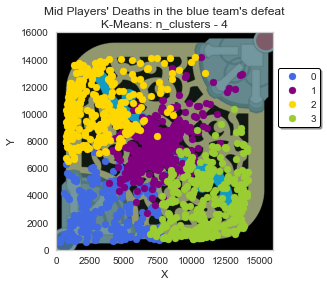

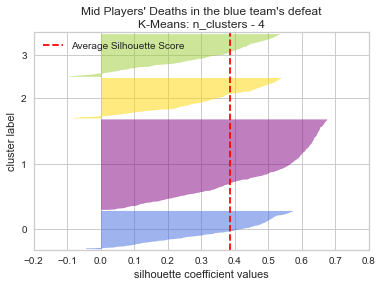

Silhouette score: 0.38699656797860316
1    672
3    316
2    300
0    283
Name: cluster, dtype: int64

Inertia: 1470.509984957699

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4286.823322,3324.830389,0.427562
1,1,7234.833333,7345.343750,-0.758929
2,2,3334.876667,10412.063333,0.000000
3,3,11034.781646,3622.189873,-0.199367


In [103]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "purple", "gold", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [104]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2049.725376,1848.577369,0.522514
1,1,1494.169014,1423.769059,0.507307
2,2,2057.037106,1924.045644,0.588784
3,3,1816.026817,2080.530238,0.661892


In [105]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,8192.0,263.0,7487.0,544.0,1,-1
1,1,13666.0,3182.0,14207.0,2719.0,1,-1
2,2,10986.0,747.0,14151.0,6569.0,1,-1
3,3,14119.0,6946.0,10342.0,785.0,1,-1


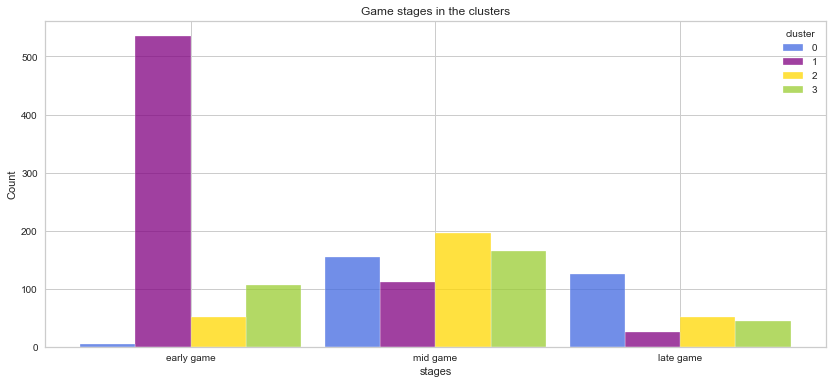

In [106]:
stagesPerClusterV2(blueSideDefeat_df, colors)

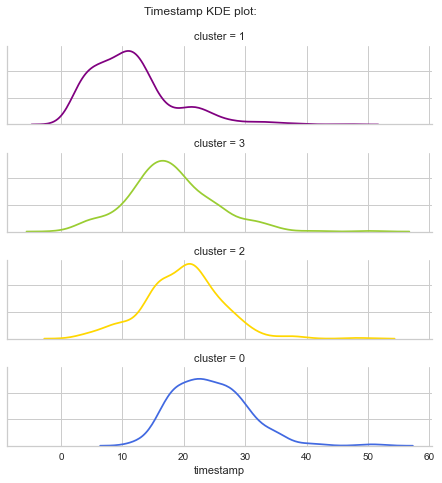

In [107]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [108]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
AurelionSol,40
Jayce,22
Sylas,20
Akali,17
Tristana,17
Viktor,16
Azir,14
Annie,13
Zoe,11
Orianna,10


Deaths with each champion:

In [109]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



AurelionSol    230
Jayce          186
Tristana       117
Sylas          112
Akali          101
Viktor          98
Azir            83
Annie           74
Irelia          62
Zoe             58
Orianna         51
Syndra          45
Cassiopeia      45
Yone            44
Leblanc         42
Taliyah         35
LeeSin          29
Vex             27
Akshan          18
Ryze            14
Zed             11
KogMaw          10
Tryndamere      10
Lissandra       10
Kassadin         9
Viego            8
Renekton         8
Corki            8
Sett             6
Gragas           6
Swain            4
TwistedFate      4
Varus            3
Galio            3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [110]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 34 champions when they won on the red side

Cluster 0 - died with 27 champions:
 ['Akali' 'Akshan' 'Annie' 'AurelionSol' 'Azir' 'Cassiopeia' 'Corki'
 'Gragas' 'Irelia' 'Jayce' 'Kassadin' 'KogMaw' 'Leblanc' 'LeeSin'
 'Lissandra' 'Orianna' 'Swain' 'Sylas' 'Syndra' 'Taliyah' 'Tristana'
 'TwistedFate' 'Varus' 'Vex' 'Viktor' 'Yone' 'Zoe']
AurelionSol    55
Jayce          33
Tristana       27
Akali          22
Viktor         18
Sylas          17
Annie          15
Zoe            12
Azir           11
Orianna        11
Taliyah        10
Syndra         10
Irelia          7
Leblanc         6
Cassiopeia      5
LeeSin          5
Yone            4
Lissandra       3
Vex             3
Gragas          2
Kassadin        1
KogMaw          1
Akshan          1
Varus           1
Swain           1
TwistedFate     1
Corki           1
Name: champion, dtype: int64

Cluster 1 - died with 34 champions:
 ['Akali' 'Akshan' 'Annie' 'AurelionSol' 'Azir' 'Cassiopeia' 'Corki'
 'Galio' 'Graga

---

### Blue Win Rate vs Red Win Rate

In [14]:
wins_df = mid_deaths_df[mid_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
13776,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,3.196450,5099.0,7769.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13782,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,5.775950,9402.0,9048.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13787,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,8.088700,8460.0,8350.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13791,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,9.290750,8613.0,6560.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
13795,EUW1_6273318007,Red,anonymous 52,euw1,Viktor,10.680233,6225.0,8479.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279048,KR_6376044922,Red,anonymous 78,kr,Azir,16.614967,14023.0,6113.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279054,KR_6376044922,Red,anonymous 78,kr,Azir,18.805617,4049.0,9916.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279063,KR_6376044922,Red,anonymous 78,kr,Azir,23.469233,4857.0,8954.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE
279069,KR_6376044922,Red,anonymous 78,kr,Azir,26.676517,12776.0,5216.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,MIDDLE


In [15]:
wins = len(np.unique(wins_df["gameId"]))
wins

568

In [16]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 61.09154929577465 vs Blue: 38.90845070422535


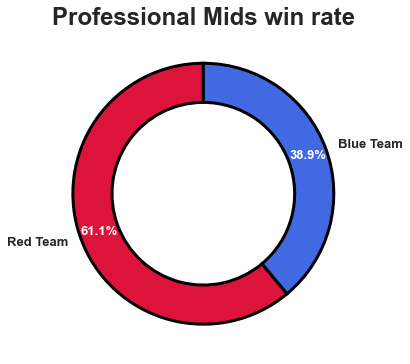

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Professional Mids win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()

In [114]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 59.306409130816505 vs Blue: 40.693590869183495
